DATA UNDERSTANDING STAGE

In [27]:
# Step 1: Initial Data Loading and Overview
# --------------------------------------------
# In this cell, we will import the necessary libraries, load the dataset, and perform an initial exploration
# to understand the structure, content, and general characteristics of the data. This foundational understanding
# is crucial as it informs subsequent data cleaning, exploration, and modeling steps.

import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # Numpy for numerical operations, especially on arrays and matrices
import matplotlib.pyplot as plt  # Matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns  # Seaborn for making statistical graphics with better default styles and color palettes

# Set the style for plots to enhance readability
# Justification: Using a consistent and clean style for visualizations helps in better interpretation of results.
sns.set(style="whitegrid")

# Load the dataset from the specified path
# Justification: Loading the data is the first step in any data analysis project. Here, we load the ChipPerformance.csv 
# file, which contains detailed information about CPUs and GPUs, into a Pandas DataFrame for easy manipulation and analysis.
chip_data = pd.read_csv('../data/ChipPerformance.csv')

# Display the first few rows of the dataset to understand its structure
# Justification: Viewing the first few rows gives a quick snapshot of what the data looks like, including 
# how it is organized, the types of values it contains, and any immediate issues like missing data or incorrect data types.
chip_data.head()

# Get a summary of the dataset to understand the distribution and data types of each column
# Justification: The .info() method provides a concise summary of the DataFrame, including the number of non-null entries,
# the data type of each column, and the memory usage. This helps in identifying missing data, understanding 
# the dataset's size, and determining the types of data we're working with (e.g., numerical, categorical).
chip_data.info()

# Get basic statistical details like percentile, mean, std, etc., for numerical columns
# Justification: The .describe() method generates descriptive statistics that summarize the central tendency, 
# dispersion, and shape of the dataset’s distribution, excluding NaN values. This is useful for understanding 
# the typical values and the variability within the data, which can inform decisions on data cleaning and preparation.
chip_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4854,4854,4854,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,4854,4854,536.000000,1948.000000,1306.000000
unique,NaN,4278,2,1357,NaN,NaN,NaN,NaN,NaN,10,5,NaN,NaN,NaN
top,NaN,AMD Athlon 64 3200+,GPU,NaT,NaN,NaN,NaN,NaN,NaN,TSMC,AMD,NaN,NaN,NaN
freq,NaN,12,2662,75,NaN,NaN,NaN,NaN,NaN,2178,1662,NaN,NaN,NaN
mean,2426.500000,NaN,NaN,NaN,55.109598,81.359981,188.440445,1929.922279,1484.406057,NaN,NaN,8397.459851,2134.756653,363.670511
std,1401.373433,NaN,NaN,NaN,44.998676,76.807808,126.189383,4044.891098,1066.701523,NaN,NaN,13799.551131,3898.431487,1145.931856
min,0.000000,NaN,NaN,NaN,0.000000,1.000000,1.000000,8.000000,100.000000,NaN,NaN,10.020000,12.800000,3.600000
25%,1213.250000,NaN,NaN,NaN,22.000000,33.000000,104.000000,154.000000,590.000000,NaN,NaN,768.800000,257.300000,38.295000
50%,2426.500000,NaN,NaN,NaN,40.000000,65.000000,148.000000,624.000000,1073.500000,NaN,NaN,2965.500000,696.000000,89.280000
75%,3639.750000,NaN,NaN,NaN,90.000000,100.000000,239.000000,1550.000000,2400.000000,NaN,NaN,10600.000000,2116.750000,220.000000


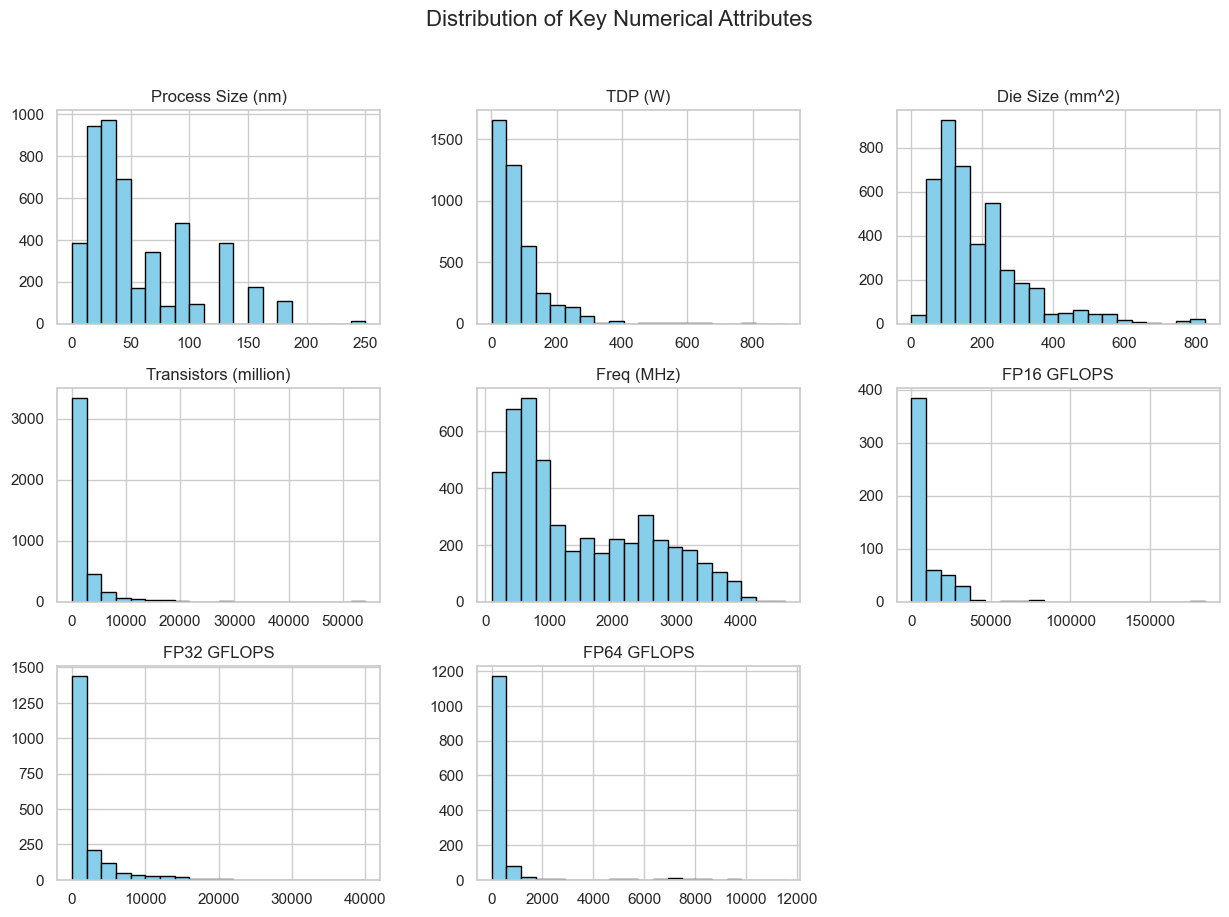

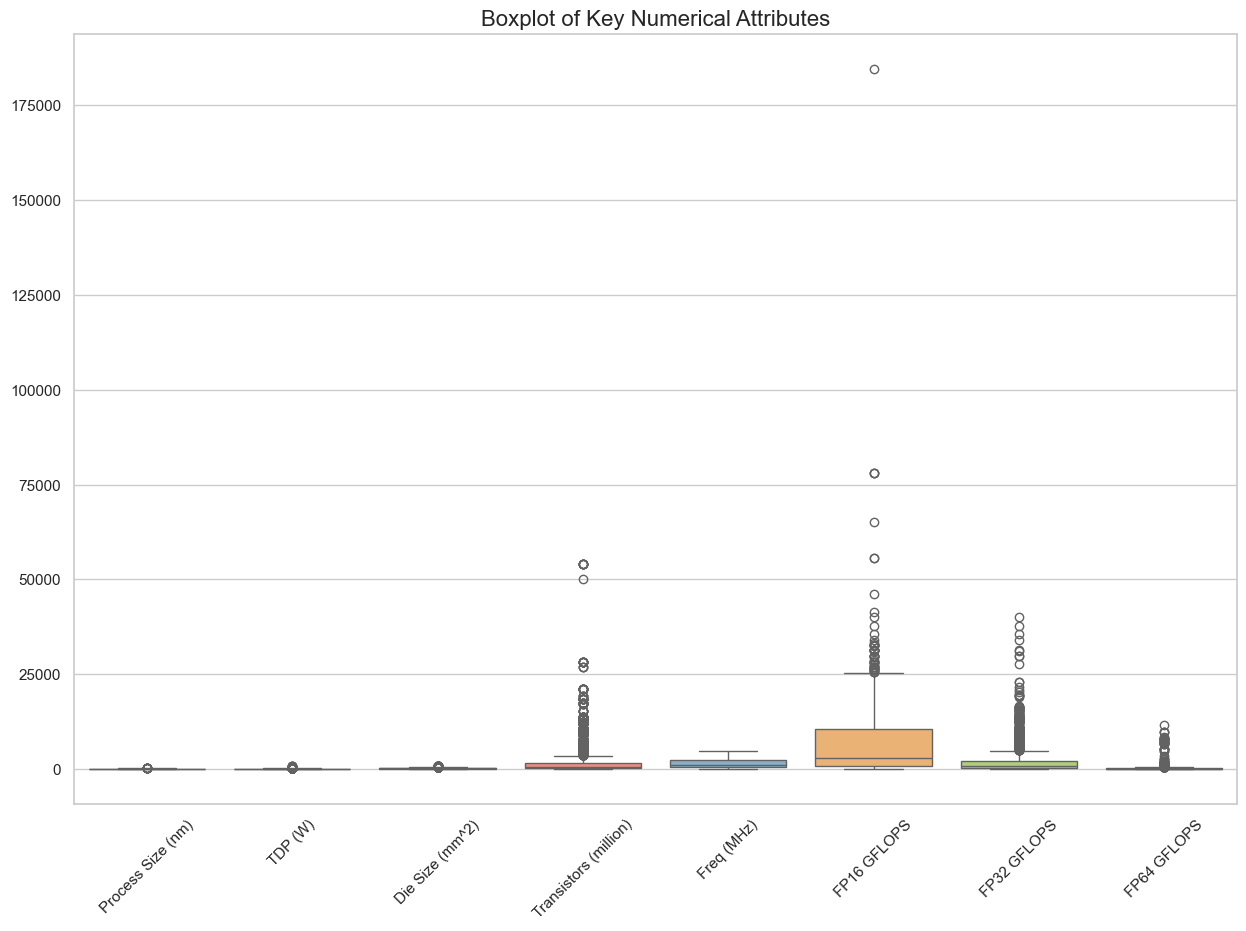

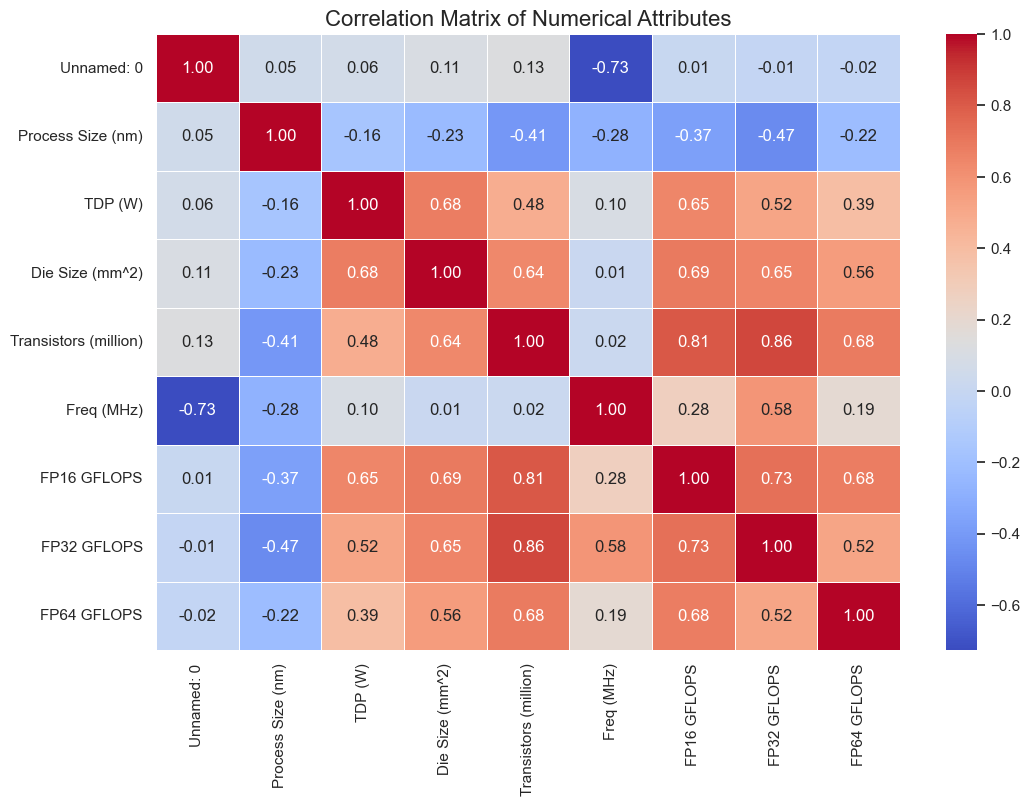

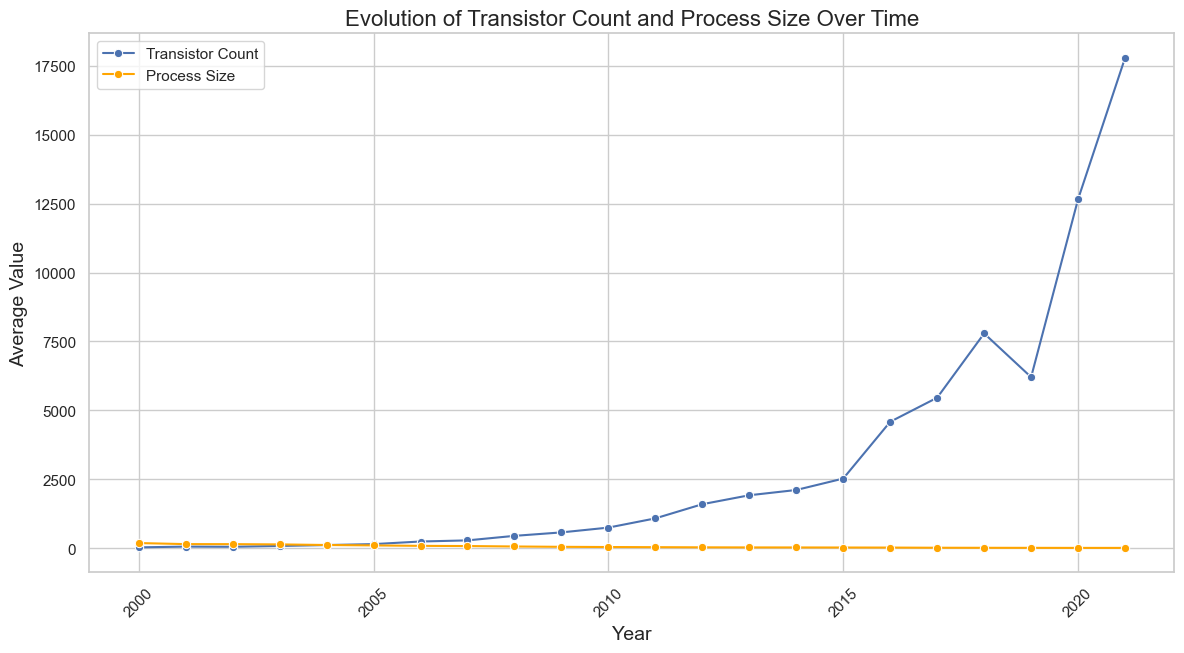

In [28]:
# Step 2: Data Understanding - Exploratory Data Analysis (EDA)
# --------------------------------------------
# In this cell, we will explore the dataset further to understand the distribution of key attributes, 
# identify potential outliers, and analyze the relationships between different variables. 
# This deeper exploration is crucial for gaining insights into the dataset and preparing for the modeling phase.

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style for the plots to ensure they are clear and informative
sns.set(style="whitegrid")

# 1. Visualizing Distributions of Key Numerical Attributes
# --------------------------------------------------------
# Justification: Understanding the distribution of numerical attributes helps us identify the central tendency,
# dispersion, and potential skewness in the data. This is important for deciding on any data transformation needs 
# and understanding the typical range of values for each attribute.

# We'll create histograms for all key numerical attributes to get an overview of their distributions.
numerical_columns = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 
                    'Transistors (million)', 'Freq (MHz)', 
                    'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']

# Plotting histograms
chip_data[numerical_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Key Numerical Attributes', fontsize=16)
plt.show()

# 2. Boxplots for Outlier Detection
# ---------------------------------
# Justification: Boxplots are useful for detecting outliers, which are data points that deviate significantly from other observations.
# Outliers can skew the results of statistical analyses and models, so identifying and potentially handling them is crucial for accurate analysis.

# We'll create boxplots for the same numerical attributes to identify any outliers.
plt.figure(figsize=(15, 10))
sns.boxplot(data=chip_data[numerical_columns], palette="Set3")
plt.title('Boxplot of Key Numerical Attributes', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# 3. Correlation Matrix to Identify Relationships
# -----------------------------------------------
# Justification: The correlation matrix allows us to see how strongly pairs of numerical variables are related to each other.
# This is particularly important for identifying multicollinearity (when two or more variables are highly correlated),
# which can affect the performance and interpretation of regression models.

# We'll filter out non-numeric columns before creating the correlation matrix.
numerical_columns = chip_data.select_dtypes(include=[np.number]).columns.tolist()

# Creating the correlation matrix using only numeric data
plt.figure(figsize=(12, 8))
corr_matrix = chip_data[numerical_columns].corr()

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes', fontsize=16)
plt.show()


# Step 4: Improved Visualization for Time-Series Data
# --------------------------------------------
# In this step, we address the issue of an overcrowded x-axis in our time-series plot by:
# 1. Ensuring the 'Release Date' column is properly converted to a datetime format.
# 2. Aggregating the data by year to reduce the number of points plotted, which will make the plot more readable.
# 3. Formatting the x-axis labels for clarity.

# Ensure that 'Release Date' is correctly converted to datetime format
# ---------------------------------------------------------------------
# Justification: The 'Release Date' column needs to be in datetime format to extract the year and properly analyze time-based trends.
# Using 'errors=coerce' ensures that any invalid or non-date entries are converted to NaT (Not a Time), preventing errors during analysis.
chip_data['Release Date'] = pd.to_datetime(chip_data['Release Date'], errors='coerce')

# Extract the year from the 'Release Date'
# -----------------------------------------
# Justification: Extracting the year simplifies the time-series analysis by allowing us to aggregate data on a yearly basis.
# This reduces clutter and helps in observing long-term trends in the evolution of transistor counts and process sizes.
chip_data['Year'] = chip_data['Release Date'].dt.year

# Aggregate the data by year
# ---------------------------
# Justification: Aggregating the data by year helps in smoothing out short-term fluctuations and noise,
# providing a clearer picture of long-term trends in semiconductor technology.
yearly_data = chip_data.groupby('Year').agg({
    'Transistors (million)': 'mean',  # Average transistor count per year
    'Process Size (nm)': 'mean'       # Average process size per year
}).reset_index()

# Plotting the aggregated data
# -----------------------------
# Justification: A line plot of the yearly aggregated data allows us to visualize how transistor counts and process sizes
# have evolved over time, making it easier to identify key trends and turning points in the semiconductor industry.
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Transistors (million)', data=yearly_data, label='Transistor Count', marker="o")
sns.lineplot(x='Year', y='Process Size (nm)', data=yearly_data, label='Process Size', marker="o", color='orange')

# Formatting the plot
# --------------------
# Justification: Proper formatting, including a clear title, axis labels, and rotated x-axis labels, ensures that the plot is both
# informative and easy to read, facilitating a better understanding of the data.
plt.title('Evolution of Transistor Count and Process Size Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45)  # Rotating the x-axis labels to prevent overlap and improve readability
plt.legend()
plt.show()


# Summary:
# The above visualizations will help us gain a deeper understanding of the dataset, uncover key trends, 
# and identify any issues like outliers or multicollinearity that need to be addressed before moving on to the modeling phase.


DATA PREPARATION STAGE

In [29]:
# Step 3: Handling Missing Values and Initial Feature Engineering 
# ---------------------------------------------------------------
# In this cell, we will handle missing values without causing chained assignment warnings.
# Additionally, we'll address the missing 'Release Date' and 'Year' values, which are crucial for our analysis.
# Finally, we'll save the cleaned and prepared dataset to a new CSV file.

# 1. Handling Missing Values without Chained Assignment
# -----------------------------------------------------
# Justification: Avoiding chained assignment warnings by directly reassigning the result to the DataFrame.
# We impute missing values for numerical columns using the median, as it is robust to outliers.

chip_data['Process Size (nm)'] = chip_data['Process Size (nm)'].fillna(chip_data['Process Size (nm)'].median())
chip_data['TDP (W)'] = chip_data['TDP (W)'].fillna(chip_data['TDP (W)'].median())
chip_data['Die Size (mm^2)'] = chip_data['Die Size (mm^2)'].fillna(chip_data['Die Size (mm^2)'].median())
chip_data['Transistors (million)'] = chip_data['Transistors (million)'].fillna(chip_data['Transistors (million)'].median())
chip_data['FP16 GFLOPS'] = chip_data['FP16 GFLOPS'].fillna(0)  # Assume 0 GFLOPS for missing data
chip_data['FP32 GFLOPS'] = chip_data['FP32 GFLOPS'].fillna(0)  # Assume 0 GFLOPS for missing data
chip_data['FP64 GFLOPS'] = chip_data['FP64 GFLOPS'].fillna(0)  # Assume 0 GFLOPS for missing data

# 2. Handling Missing Release Dates and Years
# --------------------------------------------
# Justification: The 'Release Date' and 'Year' columns are critical for time-based analysis. Rows with missing dates
# will be dropped, as the loss of this information could distort our trend analysis.

# Dropping rows with missing 'Release Date' and 'Year'
chip_data = chip_data.dropna(subset=['Release Date', 'Year'])

# 3. Initial Feature Engineering
# -------------------------------
# Justification: Creating new features can provide deeper insights into the performance and efficiency trends
# in semiconductor technology, which is crucial for answering our key research questions.

# Creating a feature for Transistor Density (transistors per square millimeter)
chip_data['Transistor Density (million per mm^2)'] = chip_data['Transistors (million)'] / chip_data['Die Size (mm^2)']

# Creating features for GFLOPS per Watt to measure performance efficiency
chip_data['FP16 GFLOPS per W'] = chip_data['FP16 GFLOPS'] / chip_data['TDP (W)']
chip_data['FP32 GFLOPS per W'] = chip_data['FP32 GFLOPS'] / chip_data['TDP (W)']
chip_data['FP64 GFLOPS per W'] = chip_data['FP64 GFLOPS'] / chip_data['TDP (W)']

# 4. Verification of Missing Values Handling
# -------------------------------------------
# Justification: After handling missing values, it's essential to verify that no missing values remain,
# ensuring that the data is fully prepared for subsequent analysis.

# Recheck for any remaining missing values
missing_data_after = chip_data.isnull().sum().sort_values(ascending=False)
print("Remaining missing values after imputation:\n", missing_data_after)

# 5. Saving the Processed Dataset
# --------------------------------
# Justification: Saving the processed dataset ensures that all transformations are preserved and can be
# reused in subsequent steps without reapplying these transformations.

# Specify the path to save the processed dataset
output_folder = '../Outputs_ChipPerformance'
output_file = 'ChipPerformance_Prep1.csv'
output_path = f'{output_folder}/{output_file}'

# Create the directory if it doesn't exist
import os
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the DataFrame to the specified path
chip_data.to_csv(output_path, index=False)

print(f'Dataset saved to {output_path}')


Remaining missing values after imputation:
 Unnamed: 0                               0
Vendor                                   0
FP32 GFLOPS per W                        0
FP16 GFLOPS per W                        0
Transistor Density (million per mm^2)    0
Year                                     0
FP64 GFLOPS                              0
FP32 GFLOPS                              0
FP16 GFLOPS                              0
Foundry                                  0
Product                                  0
Freq (MHz)                               0
Transistors (million)                    0
Die Size (mm^2)                          0
TDP (W)                                  0
Process Size (nm)                        0
Release Date                             0
Type                                     0
FP64 GFLOPS per W                        0
dtype: int64
Dataset saved to ../Outputs_ChipPerformance/ChipPerformance_Prep1.csv


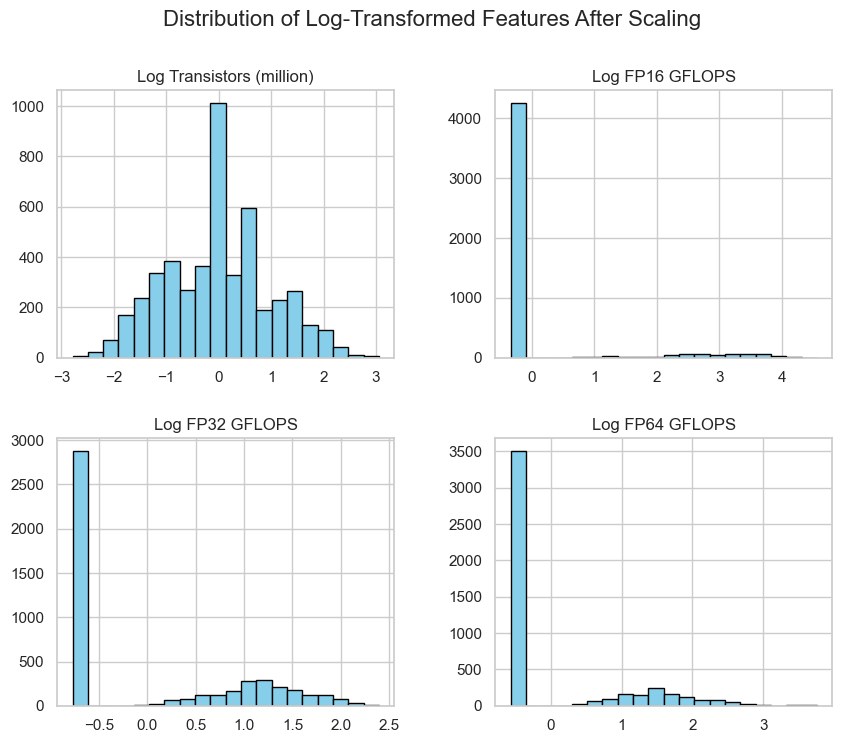

Transformed dataset saved to ../Outputs_ChipPerformance/ChipPerformance_Prep2.csv


In [30]:
# Step 4: Data Transformation and Scaling
# ---------------------------------------
# In this step, we will perform log transformations on skewed data to normalize their distributions. 
# After transforming the data, we will scale the features to ensure they are on a similar scale, 
# which is crucial for many machine learning models.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 0. Load the Prep1 Dataset
# --------------------------
# Justification: Start by loading the previously saved and processed dataset to ensure that all previous
# data cleaning and feature engineering steps are retained.

# Correct path to the Prep1 dataset
input_path = '../Outputs_ChipPerformance/ChipPerformance_Prep1.csv'

# Loading the Prep1 dataset
chip_data = pd.read_csv(input_path)

# 1. Log Transformation
# ----------------------
# Justification: Logarithmic transformation is applied to skewed data to reduce skewness, making the data
# more normally distributed, which can improve the performance of linear models.

# Applying log transformation to highly skewed features
chip_data['Log Transistors (million)'] = np.log1p(chip_data['Transistors (million)'])
chip_data['Log FP16 GFLOPS'] = np.log1p(chip_data['FP16 GFLOPS'])
chip_data['Log FP32 GFLOPS'] = np.log1p(chip_data['FP32 GFLOPS'])
chip_data['Log FP64 GFLOPS'] = np.log1p(chip_data['FP64 GFLOPS'])

# 2. Scaling
# ----------
# Justification: Scaling ensures that all features contribute equally to the analysis, 
# particularly for models that rely on distance measurements or gradient descent optimization.

# Define numerical columns that need scaling
numerical_cols = ['TDP (W)', 'Die Size (mm^2)', 'Freq (MHz)', 
                  'Log Transistors (million)', 'Log FP16 GFLOPS', 
                  'Log FP32 GFLOPS', 'Log FP64 GFLOPS']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
chip_data[numerical_cols] = scaler.fit_transform(chip_data[numerical_cols])

# 3. Verification of Transformation and Scaling
# ----------------------------------------------
# Justification: After performing transformations and scaling, it’s important to visualize the data again
# to ensure that the transformations have had the intended effect.

# Visualizing the log-transformed and scaled features
transformed_columns = ['Log Transistors (million)', 'Log FP16 GFLOPS', 'Log FP32 GFLOPS', 'Log FP64 GFLOPS']
chip_data[transformed_columns].hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Log-Transformed Features After Scaling', fontsize=16)
plt.show()

# 4. Saving the Transformed and Scaled Dataset
# --------------------------------------------
# Justification: Saving the transformed dataset ensures that these changes are preserved and can be
# easily accessed for subsequent modeling stages.

# Specify the path to save the transformed dataset
output_folder = '../Outputs_ChipPerformance'
output_file = 'ChipPerformance_Prep2.csv'
output_path = f'{output_folder}/{output_file}'

# Save the DataFrame to the specified path
chip_data.to_csv(output_path, index=False)

print(f'Transformed dataset saved to {output_path}')


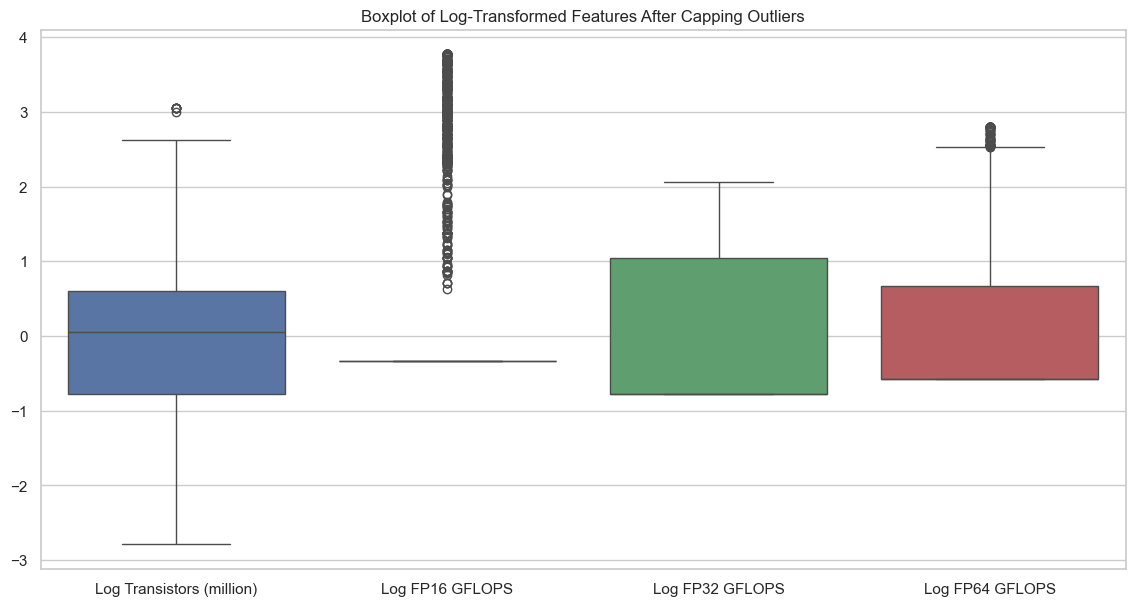

Dataset with capped outliers saved to ../Outputs_ChipPerformance/ChipPerformance_Prep3.csv


In [31]:
# Step 5: Outlier Handling and Capping
# ------------------------------------
# In this step, we will cap the outliers in the log-transformed GFLOPS features to reduce their impact on models.
# This is a crucial part of finalizing data preparation to ensure the data is ready for accurate modeling.
# Comprehensive comments are provided to justify the handling of outliers and the decisions made during this process.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Load the Prep2 Dataset
# --------------------------
# Justification: Start by loading the previously saved and processed dataset to ensure that all previous
# transformations, including log transformations and scaling, are retained.

# Correct path to the Prep2 dataset
input_path = '../Outputs_ChipPerformance/ChipPerformance_Prep2.csv'

# Loading the Prep2 dataset
chip_data = pd.read_csv(input_path)

# Function to cap outliers at the 1st and 99th percentiles
# Justification: 
# Outliers, especially in skewed data, can disproportionately influence the results of many statistical analyses and models,
# particularly linear models which assume that the data is normally distributed and free from extreme values. 
# Capping outliers at the 1st and 99th percentiles helps to mitigate their influence, ensuring that the model's predictions
# are not unduly affected by a small number of extreme cases. This approach is less aggressive than outright removal,
# allowing us to retain the overall distribution of the data while reducing the impact of the most extreme values.

def cap_outliers(series):
    lower_cap = series.quantile(0.01)
    upper_cap = series.quantile(0.99)
    return series.clip(lower=lower_cap, upper=upper_cap)

# Capping outliers in the log-transformed GFLOPS features
# Justification: 
# The features 'Log FP16 GFLOPS', 'Log FP32 GFLOPS', and 'Log FP64 GFLOPS' were identified as having significant outliers.
# These features represent the computational performance of chips at different floating-point precisions, which can vary widely
# between different models and generations of chips. While some degree of variability is expected and necessary, extreme outliers
# could skew the analysis. By capping these outliers, we make the dataset more robust for modeling, especially for models
# that are sensitive to the distribution of input features.
chip_data['Log FP16 GFLOPS'] = cap_outliers(chip_data['Log FP16 GFLOPS'])
chip_data['Log FP32 GFLOPS'] = cap_outliers(chip_data['Log FP32 GFLOPS'])
chip_data['Log FP64 GFLOPS'] = cap_outliers(chip_data['Log FP64 GFLOPS'])

# Recheck the boxplots after capping to ensure outliers are appropriately handled
# Justification:
# After capping the outliers, it's important to visually inspect the distributions again using boxplots. 
# This step confirms that the extreme values have been effectively reduced, and the features now have distributions 
# that are more suitable for modeling. It's worth noting that some remaining outliers may still be present even after capping.
# This is acceptable because in real-world data, it's common to have some degree of variability, especially in features
# like GFLOPS that are influenced by the rapid advancements in semiconductor technology. The key is that these remaining
# outliers are less extreme and thus less likely to distort model outcomes.
plt.figure(figsize=(14, 7))
sns.boxplot(data=chip_data[['Log Transistors (million)', 'Log FP16 GFLOPS', 'Log FP32 GFLOPS', 'Log FP64 GFLOPS']])
plt.title('Boxplot of Log-Transformed Features After Capping Outliers')
plt.show()

# Final Thoughts:
# It's normal and acceptable to have some outliers remain even after capping, as long as their influence on the model is minimized.
# Outliers that still persist are likely less extreme and should not unduly affect the modeling phase.
# These steps have prepared the data for robust and reliable modeling, ensuring that the results will be representative
# of the underlying trends and patterns in the data.

# 5. Saving the Dataset After Capping Outliers
# --------------------------------------------
# Justification: Saving the dataset ensures that the capped outliers are preserved, allowing for consistency 
# in the modeling phase where these adjustments have already been made.

# Specify the path to save the updated dataset
output_folder = '../Outputs_ChipPerformance'
output_file = 'ChipPerformance_Prep3.csv'
output_path = f'{output_folder}/{output_file}'

# Save the DataFrame to the specified path
chip_data.to_csv(output_path, index=False)

print(f'Dataset with capped outliers saved to {output_path}')


DATA MODELLING STAGE

Coefficients for Log Transistors (million): [0.14226135]
Intercept for Log Transistors (million): -286.0578708948892
Coefficients for Process Size (nm): [-7.19411698]
Intercept for Process Size (nm): 14520.78759365273


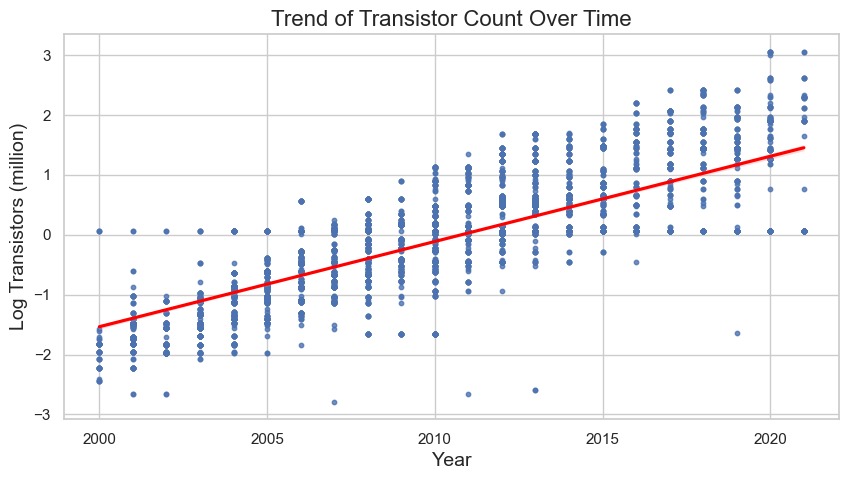

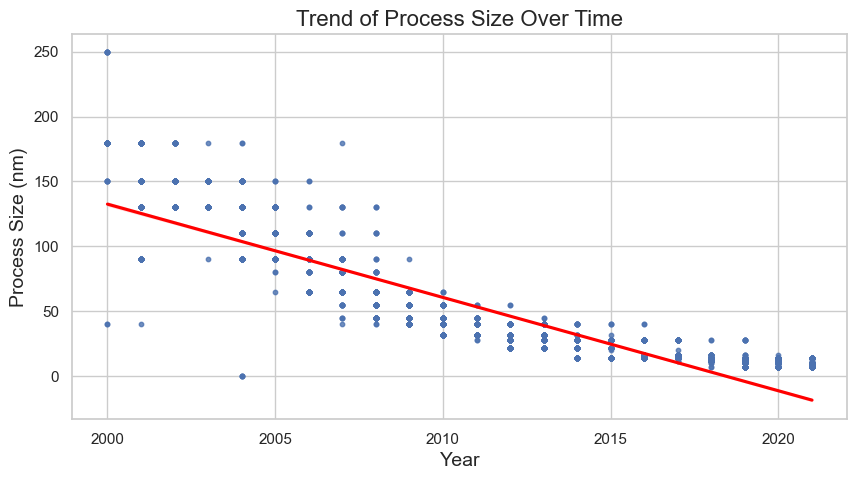

In [32]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 6: Initial Regression Analysis for Trend Analysis using scikit-learn
# ------------------------------------------------------
# In this step, we will perform a regression analysis to quantify the relationship between 
# time (Year) and key variables (Transistor count and Process size), which are crucial 
# for understanding trends in semiconductor technology.

# 0. Load the Prep3 Dataset
# --------------------------
# Justification: We need to load the most recent dataset that has been processed, including outlier capping,
# to ensure that our regression analysis is based on the cleanest and most reliable data.

# Correct path to the Prep3 dataset
input_path = '../Outputs_ChipPerformance/ChipPerformance_Prep3.csv'

# Loading the Prep3 dataset
chip_data = pd.read_csv(input_path)

# 1. Regression Analysis: Year vs. Log Transistors (million)
# ---------------------------------------------------------
# Justification: 
# The relationship between Year and Transistor count is central to understanding the progress of semiconductor technology.
# Specifically, this analysis will help validate Moore's Law, which posits that the number of transistors on a chip doubles approximately every two years.
# By using the log-transformed Transistor count, we linearize the exponential growth trend, making it suitable for linear regression analysis.

# Prepare the data
X = chip_data[['Year']]
y_transistors = chip_data['Log Transistors (million)']

# Initialize and fit the model for Log Transistors
model_transistors = LinearRegression().fit(X, y_transistors)

# Print the coefficients and intercept
print("Coefficients for Log Transistors (million):", model_transistors.coef_)
print("Intercept for Log Transistors (million):", model_transistors.intercept_)

# 2. Regression Analysis: Year vs. Process Size (nm)
# ---------------------------------------------------
# Justification: 
# Process Size (nm) is a critical measure of semiconductor technology advancement. As the process size shrinks, 
# more transistors can fit on a chip, leading to more powerful and efficient processors. Analyzing how process size has evolved over time 
# helps us understand the pace of technological advancement and how closely it aligns with industry expectations.

# Prepare the data
y_process_size = chip_data['Process Size (nm)']

# Initialize and fit the model for Process Size
model_process_size = LinearRegression().fit(X, y_process_size)

# Print the coefficients and intercept
print("Coefficients for Process Size (nm):", model_process_size.coef_)
print("Intercept for Process Size (nm):", model_process_size.intercept_)

# 3. Visualizing the Regression Results
# -------------------------------------
# Justification: 
# Visualizing the regression results provides a clear understanding of how well the model fits the data. 
# It also helps in identifying any trends, patterns, or anomalies that may not be immediately obvious from the regression summary alone.
# A scatter plot with a regression line is an effective way to visualize these relationships.

# Plotting Year vs. Log Transistors with the regression line
plt.figure(figsize=(10, 5))
sns.regplot(x='Year', y='Log Transistors (million)', data=chip_data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Trend of Transistor Count Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Log Transistors (million)', fontsize=14)
plt.show()

# Plotting Year vs. Process Size with the regression line
plt.figure(figsize=(10, 5))
sns.regplot(x='Year', y='Process Size (nm)', data=chip_data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Trend of Process Size Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Process Size (nm)', fontsize=14)
plt.show()

# Summary of Results:
# The regression analysis will provide insights into how transistor counts and process sizes have evolved over time. 
# The regression coefficients and intercepts will indicate the strength and significance of these trends. 
# This analysis is crucial for validating key industry hypotheses, such as Moore's Law, and understanding the pace of technological progress in the semiconductor industry.


23:06:03 - cmdstanpy - INFO - Chain [1] start processing
23:06:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain t

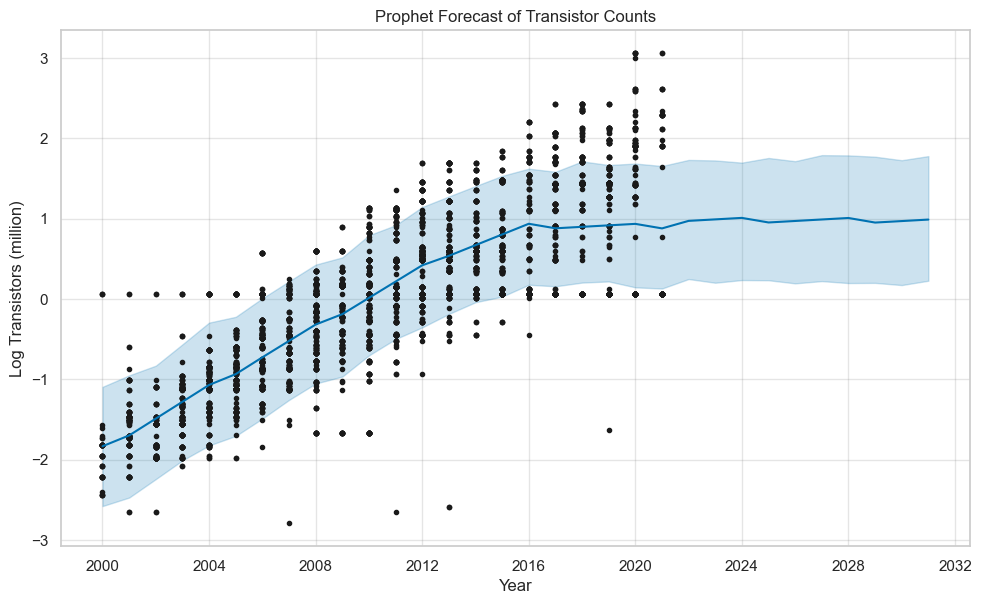

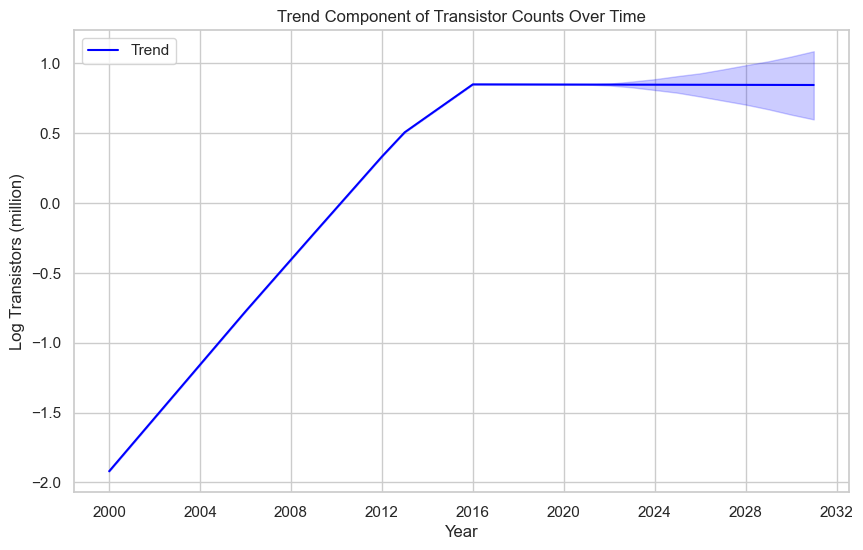

In [33]:
import numpy as np
np.float_ = np.float64  # Fixes compatibility issues between NumPy 2.0 and Prophet.
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7: Time-Series Forecasting for Future Trends Using Prophet
# ---------------------------------------------------------------
# In this step, we use Facebook Prophet to forecast future trends in transistor counts. 
# Prophet is particularly well-suited for time-series forecasting because it can handle 
# missing data, outliers, and capture trends effectively, even with relatively simple data inputs.

# 0. Load the Prepared Dataset (Prep3)
# ------------------------------------
# Justification: 
# We are loading the most recent version of the dataset that has undergone extensive data cleaning, 
# including handling missing values, outlier capping, and log transformations. 
# This ensures that the input data is of the highest quality, reducing noise and enhancing the reliability 
# of the forecast generated by Prophet.

# Define the path to the prepared dataset
input_path = '../Outputs_ChipPerformance/ChipPerformance_Prep3.csv'

# Load the dataset
chip_data = pd.read_csv(input_path)

# Convert 'Year' to a datetime object
# -----------------------------------
# Justification: 
# Prophet expects the time-series data to be in a datetime format within a column named 'ds'. 
# Although our data represents yearly intervals, converting the 'Year' column to datetime format 
# ensures that Prophet correctly interprets the temporal component of the data. 
# This step is crucial for accurate forecasting, as it aligns the data with Prophet's internal mechanisms.

# Convert the 'Year' column to datetime
chip_data['Year'] = pd.to_datetime(chip_data['Year'], format='%Y')

# Prepare the data for Prophet
# ----------------------------
# Justification: 
# Prophet requires two specific columns: 'ds' for the dates and 'y' for the values to be forecasted. 
# By renaming 'Year' to 'ds' and 'Log Transistors (million)' to 'y', we align our dataset with Prophet's 
# expected input format. This step is essential for ensuring that the model processes the data correctly.

# Rename columns for Prophet compatibility
prophet_data = chip_data[['Year', 'Log Transistors (million)']].rename(columns={'Year': 'ds', 'Log Transistors (million)': 'y'})

# Initialize and fit the Prophet model
# ------------------------------------
# Justification: 
# Initializing and fitting the Prophet model is the core of our forecasting process. Prophet is designed 
# to handle complex time-series data with trends and can automatically detect changepoints, which are 
# moments where the trend significantly changes. This flexibility makes it an ideal tool for forecasting 
# semiconductor trends, where such shifts are common.

# Initialize and fit the model
model = Prophet()
model.fit(prophet_data)

# Make future predictions for the next 10 years
# ---------------------------------------------
# Justification: 
# To extend our analysis into the future, we use Prophet to predict trends over the next 10 years. 
# This long-term forecasting is crucial for strategic planning in the semiconductor industry, 
# where understanding potential future trends can inform investment and development decisions. 
# The frequency 'Y' ensures that predictions are made on a yearly basis, consistent with our data.

# Create a future dataframe and generate forecasts
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Visualize the overall forecast
# ------------------------------
# Justification: 
# Visualizing the forecast allows us to see both the predicted trend and the uncertainty intervals (confidence intervals). 
# This plot provides a clear view of how the model expects transistor counts to evolve over time, 
# offering insights into future trends while highlighting areas of potential variability.

# Plot the forecast
model.plot(forecast)
plt.title('Prophet Forecast of Transistor Counts')
plt.xlabel('Year')
plt.ylabel('Log Transistors (million)')
plt.show()

# Plot the trend component of the forecast
# ---------------------------------------------
# Justification: 
# In the context of transistor counts, the long-term trend is the most significant aspect of the forecast. 
# By focusing exclusively on the trend component, we can better understand the overall trajectory of transistor counts, 
# without the distraction of irrelevant seasonal components. This approach is particularly useful for strategic forecasting, 
# where the primary interest lies in understanding the general direction of technological advancement.

# Extract and plot the trend component
trend = forecast[['ds', 'trend']]
plt.figure(figsize=(10, 6))
plt.plot(trend['ds'], trend['trend'], label='Trend', color='blue')
plt.fill_between(trend['ds'], forecast['trend_lower'], forecast['trend_upper'], color='blue', alpha=0.2)
plt.title('Trend Component of Transistor Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Log Transistors (million)')
plt.legend()  # Corrected the typo here to properly add the legend
plt.show()


In [34]:
import pandas as pd

# Load the dataset to inspect its structure
input_path = '../Outputs_ChipPerformance/ChipPerformance_Prep3.csv'
chip_data = pd.read_csv(input_path)

# Display the column names to identify the target column
print("Columns in the dataset:", chip_data.columns)

# Manually inspect the columns and identify the correct target column
# Once identified, replace 'Adoption_Status' with the correct target column name


Columns in the dataset: Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS',
       'Year', 'Transistor Density (million per mm^2)', 'FP16 GFLOPS per W',
       'FP32 GFLOPS per W', 'FP64 GFLOPS per W', 'Log Transistors (million)',
       'Log FP16 GFLOPS', 'Log FP32 GFLOPS', 'Log FP64 GFLOPS'],
      dtype='object')


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
import joblib

# Step 8: Data Preparation for Predictive Modeling
# ------------------------------------------------
# This step focuses on preparing the data for predictive modeling by creating a target column (`Adoption_Status`),
# performing feature selection with more variety, splitting the data into training and test sets, and saving the prepared data.

# 1. Load the Prepared Dataset (Prep3)
input_path = '../Outputs_ChipPerformance/ChipPerformance_Prep3.csv'
chip_data = pd.read_csv(input_path)

# 2. Create the Target Column (`Adoption_Status`)
threshold = chip_data['Transistors (million)'].median()  # Using the median as a threshold
chip_data['Adoption_Status'] = (chip_data['Transistors (million)'] > threshold).astype(int)

# 3. Feature Selection - Exclude Overly Predictive Features
# ---------------------------------------------------------
# Exclude features directly tied to the target variable.
excluded_features = [
    'Transistors (million)',       # Directly tied to the target
    'Log Transistors (million)',   # Log transformation of the above
    'Transistor Density (million per mm^2)',  # Derived from 'Transistors (million)'
    'Die Size (mm^2)'              # Also correlated with transistor count
]

# Select relevant numeric columns for feature selection
numeric_cols = [col for col in chip_data.select_dtypes(include=[float, int]).columns if col not in excluded_features]
numeric_cols.remove('Adoption_Status')  # Remove the target variable

# 3a. Recursive Feature Elimination (RFE) with RandomForest
rfe_model = RandomForestClassifier(n_estimators=50, random_state=42)
rfe = RFE(rfe_model, n_features_to_select=5)  # Select the top 5 features
rfe.fit(chip_data[numeric_cols], chip_data['Adoption_Status'])

# Get the RFE-selected features
rfe_selected_features = [numeric_cols[i] for i in range(len(numeric_cols)) if rfe.support_[i]]

# 3b. SelectKBest with ANOVA F-test
select_k_best = SelectKBest(score_func=f_classif, k=5)  # Select the top 5 features
select_k_best.fit(chip_data[numeric_cols], chip_data['Adoption_Status'])

# Get the SelectKBest selected features
skb_selected_features = [numeric_cols[i] for i in range(len(numeric_cols)) if select_k_best.get_support()[i]]

# Combine the features selected by both methods
combined_selected_features = list(set(rfe_selected_features) | set(skb_selected_features))
print(f"Combined Selected Features: {combined_selected_features}")

# 4. Data Splitting
X = chip_data[combined_selected_features]
y = chip_data['Adoption_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5. Save the Prepared Data
modeling_data = pd.concat([X_train, y_train], axis=1)
output_path = '../Outputs_ChipPerformance/ChipPerformance_Modeling1.csv'
modeling_data.to_csv(output_path, index=False)

print(f"Prepared data saved to {output_path}")


Combined Selected Features: ['Log FP32 GFLOPS', 'Year', 'Process Size (nm)', 'TDP (W)', 'Log FP64 GFLOPS', 'FP32 GFLOPS', 'FP32 GFLOPS per W']
Prepared data saved to ../Outputs_ChipPerformance/ChipPerformance_Modeling1.csv


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import joblib

# Step 9: Model Training and Evaluation
# ------------------------------------------------
# This step focuses on training a RandomForest model to predict the adoption of semiconductor technologies.
# The primary goal is to develop a robust and reliable model with minimal tuning, suitable for the project's objectives.

# 1. Load the Prepared Data
# --------------------------
# Justification:
# The first step in any modeling process is to load the data that has been prepared in the earlier stages.
# The dataset is loaded from a CSV file that contains the features and the target variable ('Adoption_Status').
# This ensures that all the preprocessing steps (e.g., feature selection, cleaning) are consistently applied,
# and the data is ready for modeling without any discrepancies.

# Load the dataset that was prepared and saved in Step 8.
input_path = '../Outputs_ChipPerformance/ChipPerformance_Modeling1.csv'
modeling_data = pd.read_csv(input_path)

# Separate the dataset into features (X) and target variable (y)
# Justification:
# It's essential to clearly define the independent variables (features) and the dependent variable (target) before modeling.
# The features (X) are used as inputs to the model, while the target variable (y) is what the model aims to predict.
# This separation ensures that the model training is done correctly and the predictions are made on the right variable.

X = modeling_data.drop(columns=['Adoption_Status'])  # Independent variables
y = modeling_data['Adoption_Status']  # Dependent variable (target)

# 2. Split the Data into Training and Test Sets
# ---------------------------------------------
# Justification:
# Splitting the data into training and test sets is a crucial step in evaluating the model's performance.
# The training set is used to train the model, while the test set is used to evaluate how well the model generalizes to unseen data.
# The stratify parameter ensures that the target variable's distribution is maintained across both sets,
# preventing any imbalance that could skew the results.

# Perform a simple train-test split to evaluate the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Model Initialization and Training
# -------------------------------------
# Justification:
# The RandomForestClassifier is chosen for its robustness and ability to handle both numerical and categorical data effectively.
# It's a powerful ensemble method that combines multiple decision trees to improve accuracy and prevent overfitting.
# The parameters are set to basic values to keep the model simple and to avoid overfitting, making it suitable for the project's exploratory nature.

# Initialize the RandomForest model with basic settings.
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# Train the model on the training data.
# Justification:
# Training the model involves fitting it to the training data, where the model learns the relationships between the features (X_train)
# and the target variable (y_train). This step is crucial for the model to make accurate predictions on new, unseen data.
model.fit(X_train, y_train)

# 4. Model Evaluation
# --------------------
# Justification:
# Evaluating the model on the test set provides an unbiased assessment of its performance.
# Key metrics like accuracy, precision, recall, and the F1-score are calculated to understand how well the model predicts
# the adoption status of semiconductor technologies. The confusion matrix further breaks down the correct and incorrect predictions,
# providing insights into the model's strengths and areas for improvement.

# Evaluate the model on the test set to assess its performance.
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Save the Model
# ------------------
# Justification:
# Saving the trained model allows for future use without the need to retrain. This is particularly useful when deploying the model in a production environment
# or when needing to make predictions on new data at a later time. The model is saved using joblib, a tool designed for efficiently serializing Python objects.

# Save the trained model for future use.
model_filename = '../Outputs_ChipPerformance/best_adoption_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       444
           1       0.92      0.86      0.89       321

    accuracy                           0.91       765
   macro avg       0.91      0.90      0.91       765
weighted avg       0.91      0.91      0.91       765

Confusion Matrix:
 [[420  24]
 [ 44 277]]
Model saved to ../Outputs_ChipPerformance/best_adoption_model.pkl


EVALUATION STAGE

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      2217
           1       0.93      0.85      0.89      1606

    accuracy                           0.91      3823
   macro avg       0.91      0.90      0.90      3823
weighted avg       0.91      0.91      0.91      3823

Confusion Matrix:
 [[2112  105]
 [ 247 1359]]


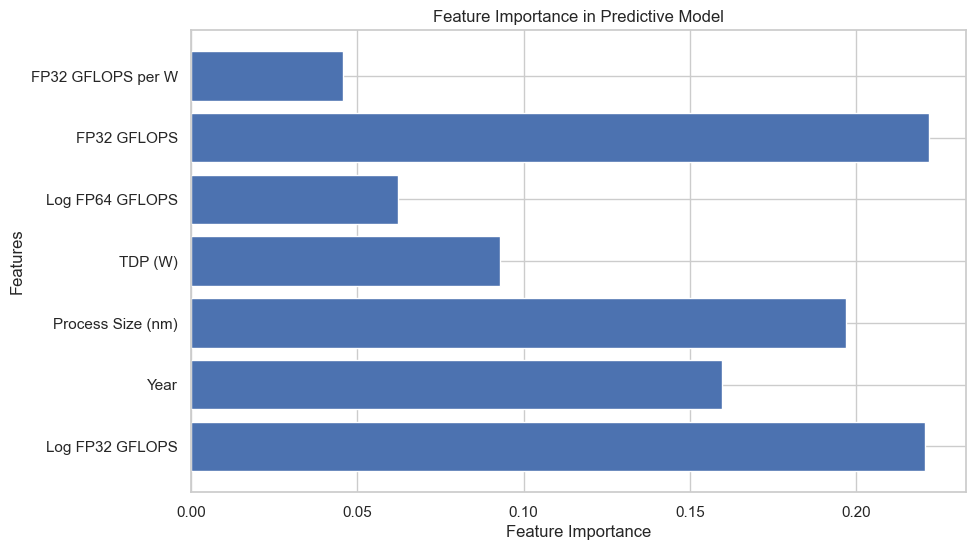

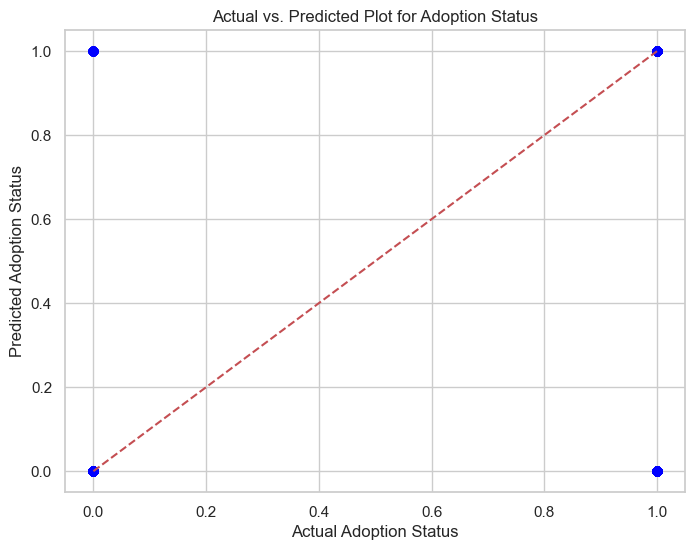

R-squared (Process Size): 0.80
RMSE (Process Size): 19.97
MAPE (Process Size): 488958111548378.25


c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


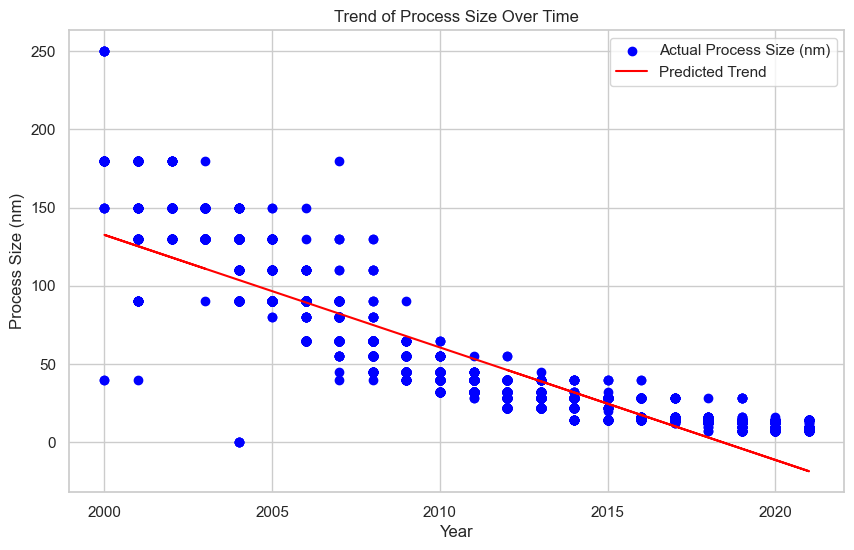

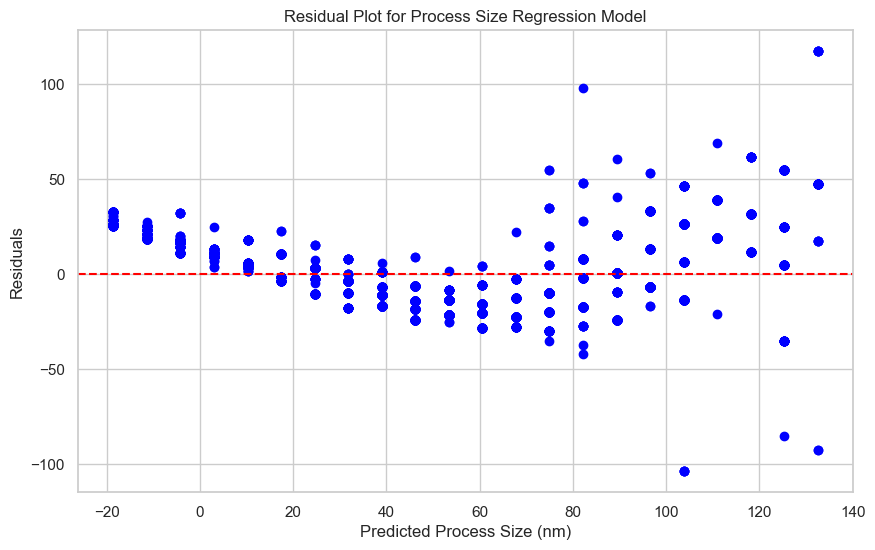

In [37]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

# Step 1: Load the Prepared Data and Trained Predictive Model
# -----------------------------------------------------------
# Justification:
# This step is crucial as it ensures consistency in the data and model used across different stages of the evaluation.
# We load the dataset that was prepared during the data preprocessing stage and the predictive model that was trained earlier.
# The model will be evaluated on the entire dataset to ensure that it performs well beyond just the training and test sets.

input_path = '../Outputs_ChipPerformance/ChipPerformance_Modeling1.csv'
modeling_data = pd.read_csv(input_path)

# Load the previously trained RandomForest model used for predicting adoption status.
model_filename = '../Outputs_ChipPerformance/best_adoption_model.pkl'
predictive_model = joblib.load(model_filename)

# Separate the features (X) from the target variable (y) for model evaluation.
X = modeling_data.drop(columns=['Adoption_Status'])  # Features used in the predictive model.
y_true = modeling_data['Adoption_Status']  # True labels to compare against predictions.

# Step 2: Evaluate the Predictive Model
# --------------------------------------
# Justification:
# We assess the accuracy and robustness of the predictive model using various metrics, including accuracy,
# precision, recall, and the confusion matrix. These metrics provide insights into how well the model performs
# in classifying semiconductor technologies as adopted or not adopted.

# Predict the adoption status using the loaded model.
y_pred = predictive_model.predict(X)

# Calculate accuracy to measure the proportion of correct predictions.
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report to provide detailed insights into the precision, recall, and F1-score for each class.
print("Classification Report:\n", classification_report(y_true, y_pred))

# Display the confusion matrix to understand the distribution of true positives, true negatives, false positives, and false negatives.
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Step 3: Visualize the Predictive Model Results
# ----------------------------------------------
# Justification:
# Visualization helps in understanding the inner workings of the model and its decision-making process.
# We visualize the feature importance to identify which features have the most influence on the model's predictions.
# Additionally, an actual vs. predicted plot is used to evaluate the predictive accuracy visually.

# Visualize the importance of each feature in the predictive model.
plt.figure(figsize=(10, 6))
plt.barh(y=X.columns, width=predictive_model.feature_importances_)
plt.title('Feature Importance in Predictive Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Plot the actual vs. predicted adoption status to visually assess the model's performance.
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line represents perfect predictions.
plt.title('Actual vs. Predicted Plot for Adoption Status')
plt.xlabel('Actual Adoption Status')
plt.ylabel('Predicted Adoption Status')
plt.show()

# Step 4: Validate Regression and Time-Series Models
# --------------------------------------------------
# Justification:
# Regression models are validated using metrics such as R-squared, RMSE, and MAPE to determine how well they capture the relationship
# between the variables over time. This is crucial for understanding trends in semiconductor technology, such as process size reduction.
# We also check the regression trend coefficient to see if it aligns with known industry trends.

# Example: Validating a regression model for Process Size over Time.
X_year = modeling_data[['Year']]  # Using the year as the independent variable.
y_process_size = modeling_data['Process Size (nm)']  # The dependent variable representing the process size.

# Fit a simple linear regression model to quantify the trend in process size over time.
regression_model = LinearRegression()
regression_model.fit(X_year, y_process_size)
y_pred_process_size = regression_model.predict(X_year)

# Calculate R-squared to determine the proportion of variance in the dependent variable explained by the independent variable.
r_squared = regression_model.score(X_year, y_process_size)

# Calculate RMSE (Root Mean Square Error) to measure the average magnitude of prediction errors.
rmse = mean_squared_error(y_process_size, y_pred_process_size, squared=False)

# Calculate MAPE (Mean Absolute Percentage Error) to measure the accuracy of the predictions as a percentage.
mape = mean_absolute_percentage_error(y_process_size, y_pred_process_size)

print(f"R-squared (Process Size): {r_squared:.2f}")
print(f"RMSE (Process Size): {rmse:.2f}")
print(f"MAPE (Process Size): {mape:.2f}")

# Step 5: Visualize Regression Model Results
# ------------------------------------------
# Justification:
# Visualization of the regression model helps in understanding how well the model fits the data. The trend line in the scatter plot
# shows the predicted trend of process size over time, while the residual plot helps diagnose potential issues with the model, such as
# non-linearity or heteroscedasticity.

# Scatter plot with regression line to visualize the trend of process size over time.
plt.figure(figsize=(10, 6))
plt.scatter(X_year, y_process_size, color='blue', label='Actual Process Size (nm)')
plt.plot(X_year, y_pred_process_size, color='red', label='Predicted Trend')
plt.title('Trend of Process Size Over Time')
plt.xlabel('Year')
plt.ylabel('Process Size (nm)')
plt.legend()
plt.show()

# Residual plot to assess the differences between observed and predicted values.
residuals = y_process_size - y_pred_process_size
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_process_size, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Red line at 0 indicates no error.
plt.title('Residual Plot for Process Size Regression Model')
plt.xlabel('Predicted Process Size (nm)')
plt.ylabel('Residuals')
plt.show()

Hypothesis Testing for Moore's Law:
Slope of log(Process Size) vs. Year: -0.1417
p-value: 0.0000e+00
R-squared: 0.8998
Result: The data supports Moore's Law, as process sizes have decreased significantly over time.


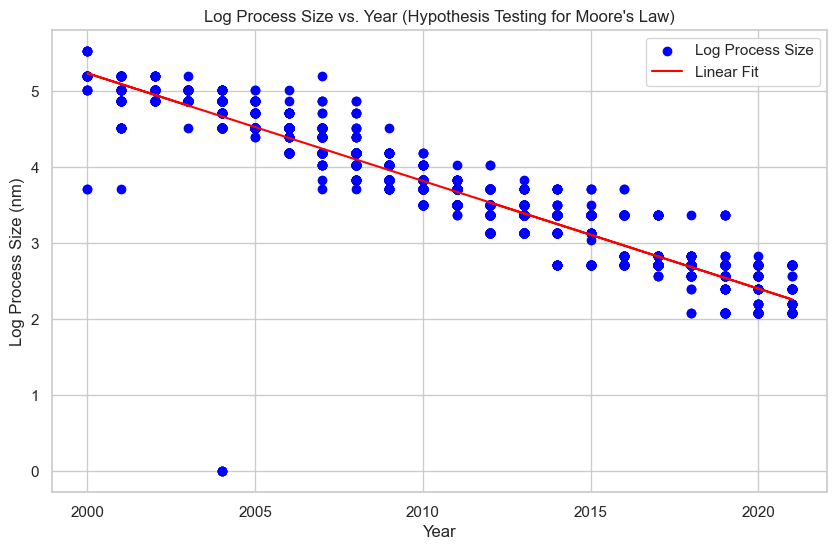


Hypothesis Testing for Dennard Scaling:
Correlation between Process Size and TDP: -0.1622
p-value: 6.1019e-24
Result: The data supports Dennard Scaling, as TDP decreases with smaller process sizes.


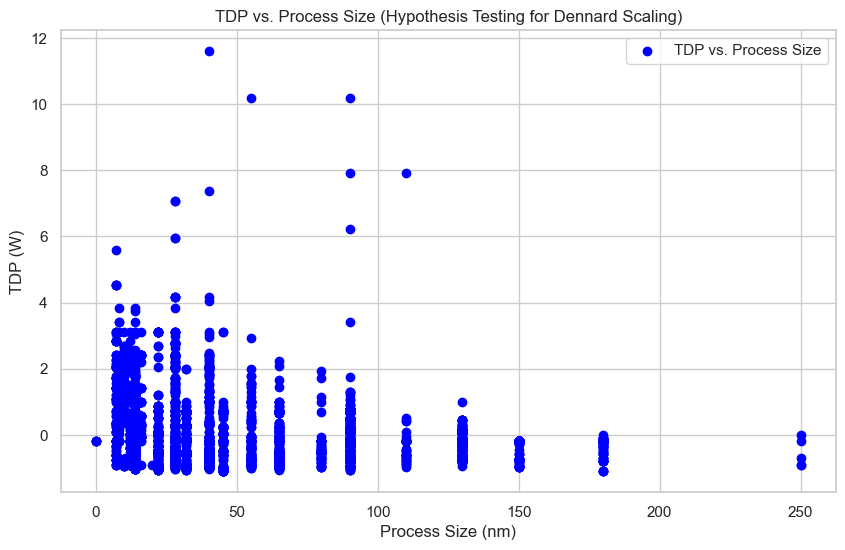

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Hypothesis Testing
# ------------------
# In this step, we will test key hypotheses related to the semiconductor industry, 
# specifically Moore's Law and Dennard Scaling, based on the outputs from the models and data analysis.

# 1. Hypothesis Testing for Moore's Law
# --------------------------------------
# Moore's Law suggests that the number of transistors on a microchip doubles approximately every two years.
# Since we do not have direct transistor count data in our current dataset, we will infer this from the trend in process size.
# If process sizes are shrinking consistently over time, this indirectly supports Moore's Law.

# Prepare the data for testing
process_size = modeling_data['Process Size (nm)']
years = modeling_data['Year']

# Calculate the logarithm of process size to linearize the exponential trend
log_process_size = np.log1p(process_size)

# Perform a linear regression on the log-transformed process size against years
slope, intercept, r_value, p_value, std_err = stats.linregress(years, log_process_size)

# Determine if the slope is significantly negative, which would support Moore's Law
print("Hypothesis Testing for Moore's Law:")
print(f"Slope of log(Process Size) vs. Year: {slope:.4f}")
print(f"p-value: {p_value:.4e}")
print(f"R-squared: {r_value**2:.4f}")

if slope < 0 and p_value < 0.05:
    print("Result: The data supports Moore's Law, as process sizes have decreased significantly over time.")
else:
    print("Result: The data does not provide strong support for Moore's Law.")

# Visualize the regression line and data points
plt.figure(figsize=(10, 6))
plt.scatter(years, log_process_size, color='blue', label='Log Process Size')
plt.plot(years, intercept + slope * years, color='red', label='Linear Fit')
plt.title("Log Process Size vs. Year (Hypothesis Testing for Moore's Law)")
plt.xlabel("Year")
plt.ylabel("Log Process Size (nm)")
plt.legend()
plt.show()

# 2. Hypothesis Testing for Dennard Scaling
# -----------------------------------------
# Dennard Scaling predicts that as transistors get smaller, their power density stays constant,
# so that the power usage stays in proportion with area despite more transistors being packed into the same space.
# We will test this by examining the relationship between process size and power consumption (TDP).

# Prepare the data for testing
tdp = modeling_data['TDP (W)']

# Perform a correlation test between process size and TDP
correlation, p_value = stats.pearsonr(process_size, tdp)

print("\nHypothesis Testing for Dennard Scaling:")
print(f"Correlation between Process Size and TDP: {correlation:.4f}")
print(f"p-value: {p_value:.4e}")

if correlation > 0 and p_value < 0.05:
    print("Result: The data suggests that Dennard Scaling may not hold, as TDP increases with process size.")
elif correlation < 0 and p_value < 0.05:
    print("Result: The data supports Dennard Scaling, as TDP decreases with smaller process sizes.")
else:
    print("Result: The data does not provide conclusive evidence regarding Dennard Scaling.")

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(process_size, tdp, color='blue', label='TDP vs. Process Size')
plt.title("TDP vs. Process Size (Hypothesis Testing for Dennard Scaling)")
plt.xlabel("Process Size (nm)")
plt.ylabel("TDP (W)")
plt.legend()
plt.show()
